[Data California House ](https://drive.google.com/drive/u/0/folders/19YA_f36uGR86hTnZuX-Ech59s3AFzXXo)

### **Contents**

1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation


**CALIFORNIA HOUSE**

## 1. Business Problem Understanding


**Context**

Dataset yang digunakan pada projek ini merupakan kumpulan data perumahan di wilayah California, Amerika Serikat, yang diambil dari hasil sensus tahun 1990.

Dataset ini memuat berbagai informasi demografis seperti pendapatan rata-rata penduduk, jumlah populasi, dan tingkat hunian rumah di setiap distrik.

Selain itu, terdapat juga informasi geografis seperti latitude dan longitude, serta karakteristik rumah seperti jumlah kamar, jumlah kamar tidur, dan usia rata-rata rumah di wilayah tersebut.

Informasi ini sangat relevan bagi industri properti, karena dapat menggambarkan bagaimana kondisi sosial-ekonomi suatu daerah berhubungan dengan nilai pasar properti di area tersebut.

**Problem Statement**

Salah satu tantangan utama yang dihadapi developer perumahan adalah menentukan harga jual rumah yang tepat serta memilih lokasi pengembangan yang sesuai dengan daya beli dan kebutuhan pasar.
Kesalahan dalam menilai potensi suatu wilayah dapat berdampak pada kerugian besar — misalnya membangun rumah dengan harga tinggi di daerah dengan pendapatan rendah, atau sebaliknya, membangun rumah standar di kawasan elit dengan potensi keuntungan besar.
Oleh karena itu, dibutuhkan sebuah pendekatan berbasis data yang mampu membantu developer memahami hubungan antara faktor demografis, geografis, dan karakteristik rumah terhadap nilai pasar properti di California.

**Goals**

Tujuan utama dari projek ini adalah membangun model machine learning yang mampu memprediksi median house value atau harga jual median rumah berdasarkan fitur-fitur yang tersedia dalam dataset.

Dengan memanfaatkan variabel seperti jumlah kamar, pendapatan rata-rata penduduk, kepadatan populasi, dan jarak terhadap laut, model ini diharapkan dapat membantu perusahaan properti untuk:

1. Menentukan strategi harga yang kompetitif,
2. Mengidentifikasi wilayah potensial untuk investasi, dan
3. Merancang strategi pemasaran dan pengembangan produk yang sesuai dengan karakteristik pasar lokal.

Selain itu, hasil prediksi juga dapat menjadi dasar pengambilan keputusan strategis jangka panjang, seperti:
- perencanaan ekspansi kawasan perumahan,
- penerapan dynamic pricing strategy, dan
- evaluasi portofolio investasi berdasarkan tren demografi dan lokasi geografis.

**Analytic Approach**

Pendekatan analitik yang digunakan adalah regresi, karena target variabel yang ingin diprediksi, yaitu median_house_value, bersifat numerik dan kontinu.

Tahapan analisis diawali dengan eksplorasi data untuk memahami pola hubungan antara fitur demografis, geografis, dan karakteristik rumah dengan harga median.
Selanjutnya, dilakukan pembangunan model prediktif menggunakan beberapa algoritma regresi seperti Linear Regression, Decision Tree, Random Forest, Gradient Boosting, dan XGBoost.

Pemilihan algoritma terbaik akan didasarkan pada performa model dalam meminimalkan error, dengan tujuan akhir menghasilkan model yang akurat, stabil, dan dapat diinterpretasikan secara bisnis.

**Metric Evaluation**

Untuk mengevaluasi performa model, digunakan beberapa metrik regresi, antara lain:
- Root Mean Squared Error (RMSE) : untuk mengukur rata-rata deviasi kuadrat dari prediksi terhadap nilai aktual,
- Mean Absolute Error (MAE) ; untuk menghitung rata-rata kesalahan absolut, dan
- Mean Absolute Percentage Error (MAPE) : untuk mengukur rata-rata kesalahan dalam bentuk persentase.

> Semakin kecil nilai RMSE, MAE, dan MAPE, semakin baik model dalam memprediksi harga rumah.

Selain itu, jika model yang digunakan bersifat linear, metrik tambahan seperti R-squared (R²) atau Adjusted R² dapat digunakan untuk mengukur seberapa baik variabel-variabel independen menjelaskan variasi target.
Namun, metrik ini tidak relevan untuk model non-linear seperti Random Forest atau XGBoost.

##2. Data Understanding

- Dataset ini berisi informasi hasil sensus 1990 di distrik-distrik California.
- Tiap baris mewakili satu blok distrik dengan ringkasan data demografi dan karakteristik perumahan.

**Attribute Information dan Insight Bisnis**

| No | NAME | Data Type | Detail | Kaitannya |
|:---------|:-----:|:-----:|:-----:|-------|
| 1        | `longitude & latitude`  | Float | lokasi geografis yang memengaruhi nilai tanah.| wilayah yang dekat pusat kota atau pantai umumnya lebih mahal |
| 2       | `housing_median_age`  | Float | Rata-rata Usia rumah di area. |rumah lebih baru sering bernilai lebih tinggi. |
| 3       | `total_rooms & total_bedrooms`  | Float | Menggambarkan ukuran dan kapasitas rumah di area.| properti dengan lebih banyak kamar biasanya memiliki nilai jual lebih besar.|
| 4       | `population`  | Float | Jumlah total penduduk di area. | Kepadatan penduduk dapat mengindikasikan permintaan perumahan dan potensi pasar |
| 5       | `households`  | Float | Total penghuni di area. | membantu menghitung kebutuhan hunian |
| 6       | `median_income`  | Float | Faktor daya beli| pendapatan lebih tinggi cenderung berkorelasi dengan harga rumah lebih tinggi. |
| 7      | `median_house_value`  | Float | Nilai median harga rumah (USD) sebagai target analisis/prediksi.| mengukur nilai median properti sebagai dasar prediksi harga. |
| 8        | `ocean_proximity`  | Object | Kategori jarak lokasi terhadap laut (misal: <1H OCEAN, INLAND).| Kedekatan dengan laut memengaruhi daya tarik dan harga properti, misalnya rumah dekat pantai biasanya premium. |# Import library

In [2]:
# Import library yang dibutuhkan

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load Dataset

df = pd.read_csv('data_california_house.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14311 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   ocean_proximity     14448 non-null  object 
 9   median_house_value  14448 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.1+ MB


## 3. Exploratory Data Analysis

bertujuan untuk memahami karakteristik data dengan cara:
1. Mengamati distribusi variabel numerik & kategorikal,
2. Mengidentifikasi outlier,
3. Melihat korelasi antar variabel,
4. Menilai hubungan antara fitur utama dengan target,
5. Menggali pola geografis harga rumah,
6. Menyajikan visualisasi peta lokasi untuk memperkuat pemahaman spasial.

**Distribusi variabel numerik**

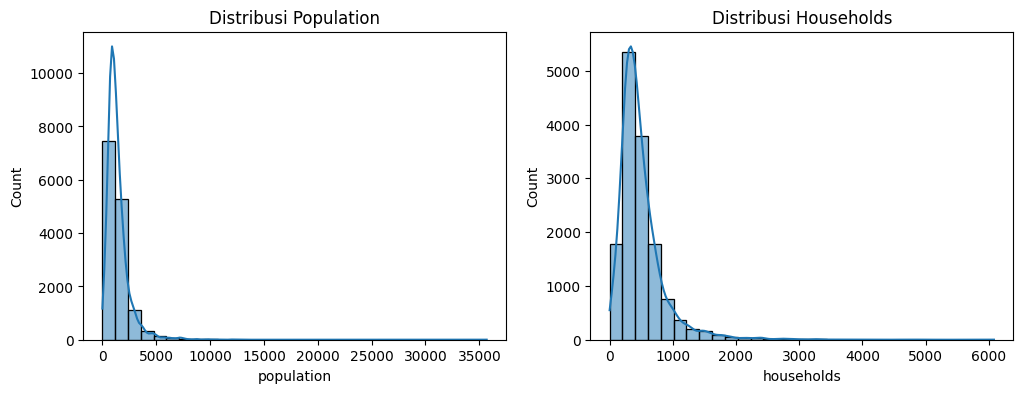

In [5]:
# Variabel Demografi: population, households
fig, axes = plt.subplots(1, 2, figsize=(12,4))
sns.histplot(df['population'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Distribusi Population')
sns.histplot(df['households'], bins=30, kde=True, ax=axes[1])
axes[1].set_title('Distribusi Households')
plt.show()


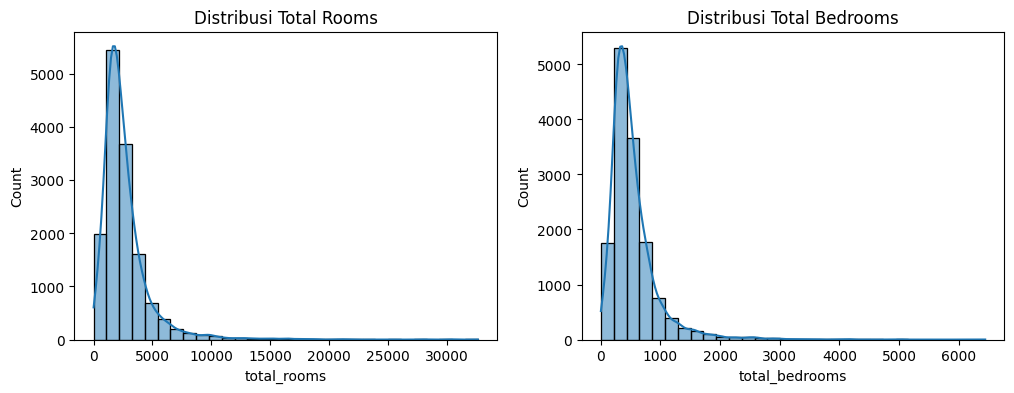

In [6]:
# 2. Variabel Hunian: total_rooms, total_bedrooms
fig, axes = plt.subplots(1, 2, figsize=(12,4))
sns.histplot(df['total_rooms'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Distribusi Total Rooms')
sns.histplot(df['total_bedrooms'], bins=30, kde=True, ax=axes[1])
axes[1].set_title('Distribusi Total Bedrooms')
plt.show()

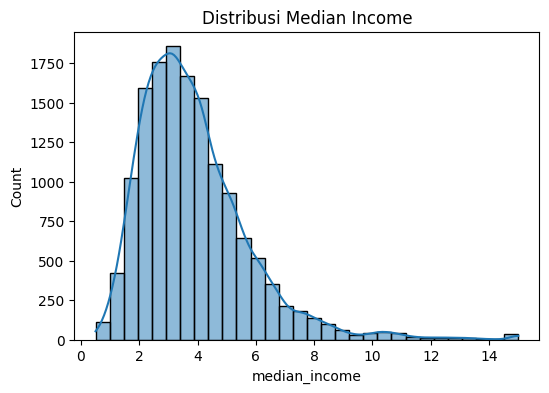

In [7]:
# 3. Variabel Ekonomi: median_income

plt.figure(figsize=(6,4))
sns.histplot(df['median_income'], bins=30, kde=True)
plt.title('Distribusi Median Income')
plt.show()

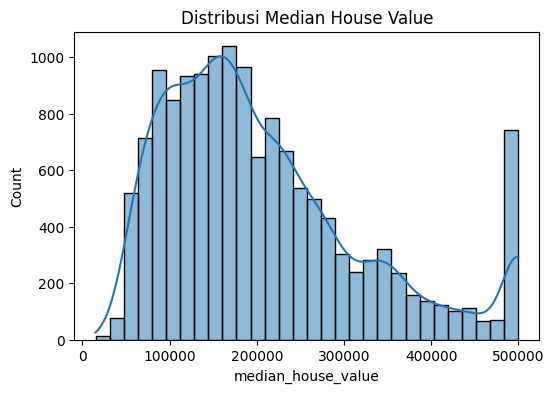

In [9]:
# 4. Distribusi Variabel Target : median_house_value
plt.figure(figsize=(6,4))
sns.histplot(df['median_house_value'], bins=30, kde=True)
plt.title('Distribusi Median House Value')
plt.show()

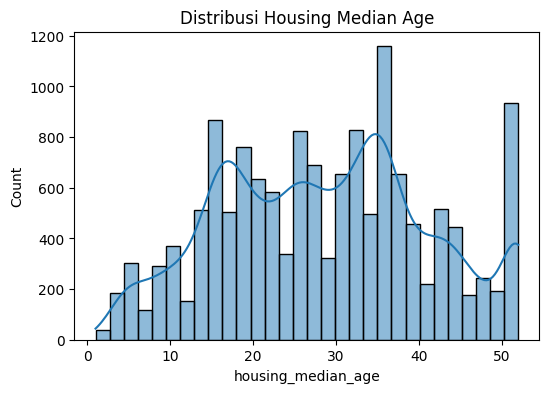

In [8]:
# 5. Variabel Lokasi & Usia: longitude, latitude, housing_median_age

plt.figure(figsize=(6,4))
sns.histplot(df['housing_median_age'], bins=30, kde=True)
plt.title('Distribusi Housing Median Age')
plt.show()


Sebagian besar distrik memiliki jumlah total_rooms di bawah 10.000, tetapi terdapat outlier ekstrem dengan ratusan ribu kamar. Hal ini kemungkinan bukan rumah tunggal, melainkan area apartemen besar atau kompleks multi-unit. total_bedrooms, population, dan households juga menunjukkan pola serupa dengan ekor distribusi yang panjang. Target median_house_value mayoritas berada di bawah 200.000 USD, tetapi terdapat sebagian kecil area dengan harga lebih dari 500.000 USD. Distribusi yang sangat skewed ini menandakan perlunya transformasi (misalnya log) agar model lebih stabil.

**Distribusi Variabel Kategorikal**

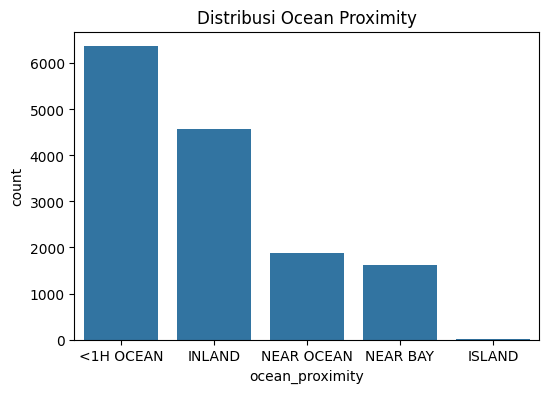

In [ ]:
# Distribusi ocean_proximity
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='ocean_proximity', order=df['ocean_proximity'].value_counts().index)
plt.title('Distribusi Ocean Proximity')
plt.show()



Kategori <1H OCEAN paling mendominasi, artinya mayoritas distrik berada dalam jarak kurang dari 1 jam dari laut. Hal ini wajar mengingat banyak kota besar California terletak dekat pantai. Kategori INLAND juga cukup banyak, sedangkan ISLAND sangat jarang. Distribusi ini mengindikasikan bahwa proximity ke laut dapat menjadi variabel pembeda harga rumah, sehingga encoding kategorikal untuk variabel ini akan dilakukan di tahap preprocessing.

**Hubungan Antar Variabel Utama**

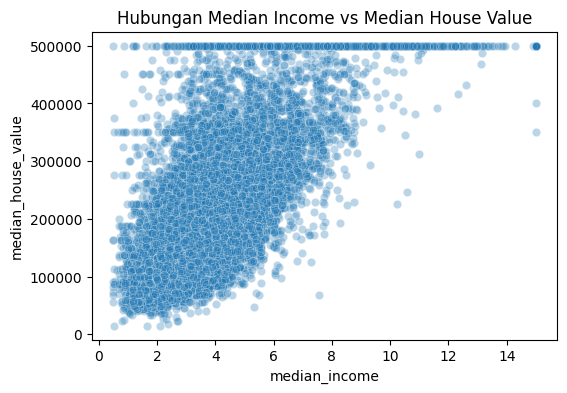

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='median_income', y='median_house_value', alpha=0.3)
plt.title('Hubungan Median Income vs Median House Value')
plt.show()

Terdapat hubungan positif yang kuat: semakin tinggi pendapatan median, semakin tinggi harga rumah. Namun garis horizontal pada $500.001 menunjukkan capping, yang bisa membuat model sulit memprediksi rumah mewah.

**Pola Geospasial**

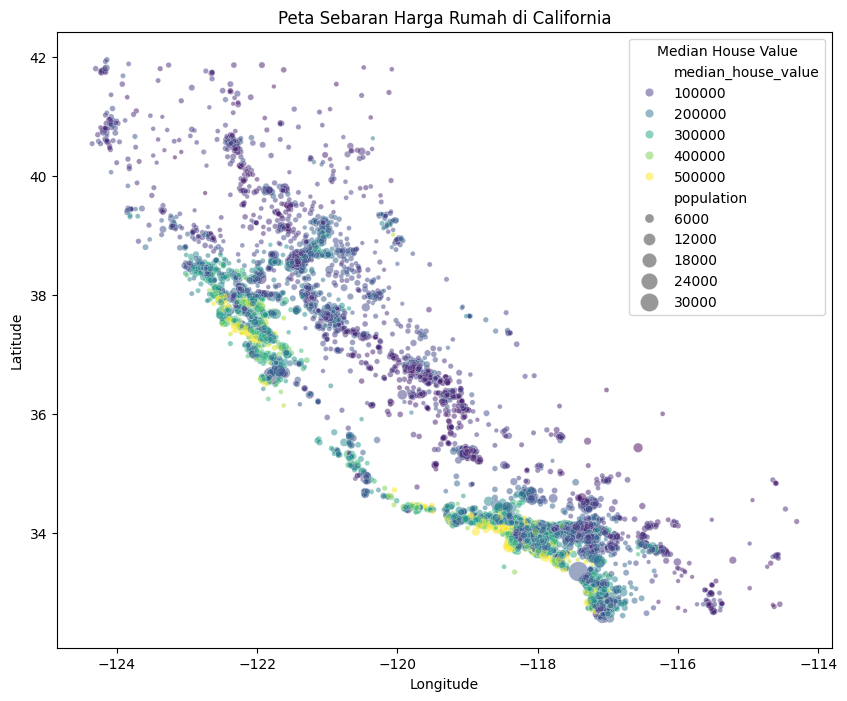

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(
    data=df,
    x="longitude",
    y="latitude",
    hue="median_house_value",
    palette="viridis",
    alpha=0.5,
    size="population",
    sizes=(10, 200)  # bubble menyesuaikan populasi
)
plt.title("Peta Sebaran Harga Rumah di California")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Median House Value", loc="upper right")
plt.show()


Sebaran lokasi menunjukkan bahwa harga rumah lebih mahal cenderung berada di wilayah pesisir (barat California), khususnya di sekitar Los Angeles dan San Francisco. Sementara harga rumah di wilayah pedalaman relatif lebih rendah. Temuan ini memperkuat pentingnya mempertahankan longitude dan latitude sebagai fitur dalam model, karena lokasi geografis berperan besar dalam menentukan nilai rumah.

**Visualisasi Peta Lokasi**

In [ ]:
import folium

# Titik tengah California
california_map = folium.Map(location=[36.77, -119.41], zoom_start=6)

# Tambahkan marker (sampel 500 data agar tidak terlalu berat)
for _, row in df.sample(500, random_state=42).iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        color='blue' if row['median_house_value'] < 200000 else
              'orange' if row['median_house_value'] < 400000 else 'red',
        fill=True,
        fill_opacity=0.6,
        popup=f"Harga Median: ${row['median_house_value']:.0f}\nPendapatan Median: {row['median_income']:.2f}"
    ).add_to(california_map)

california_map


Pada peta statis (scatterplot), terlihat jelas bahwa distrik dengan harga rumah tinggi terkonsentrasi di pantai California (San Francisco Bay Area & Los Angeles). Distrik pedalaman (INLAND) memiliki harga rumah lebih rendah, sesuai dengan kategori ocean_proximity.

Bubble besar menandakan distrik dengan populasi besar → umumnya di area perkotaan/metropolitan.

Pada peta interaktif (folium), distrik dengan harga rumah tinggi ditandai warna merah, sedang oranye, dan rendah biru. Pola ini mempertegas pengaruh lokasi geografis dan kedekatan ke laut terhadap harga rumah.

## 4.  Data Preprocessing

Tahap ini bertujuan untuk memastikan data siap dipakai dalam pemodelan dengan cara:
1. Menangani missing value,
2. Mengecek dan menghapus duplikasi,
3. Mengidentifikasi dan mengatasi outlier,
4. Menyiapkan encoding variabel kategorikal,
5. Menstandarkan/normalisasi variabel numerik bila diperlukan.

**Duplicate**

In [ ]:
df.duplicated().sum()

np.int64(0)

Hasil pengecekan menunjukkan bahwa dataset tidak memiliki duplikat sehingga tidak perlu dilakukan penghapusan.

**Missing Value**

In [ ]:
df_null = df.isnull().sum()

missing_percentage = (df.isnull().sum() / len(df)) * 100

missing_info = pd.DataFrame({'Missing Values': df_null, 'Percentage (%)': missing_percentage}).sort_values(by='Percentage (%)', ascending=False)
missing_info[missing_info['Missing Values'] > 0]

,Missing Values,Percentage (%)
total_bedrooms,137,0.948228


"Hanya fitur total_bedrooms yang memiliki nilai kosong beberapa ratus baris. Karena total_bedrooms berhubungan langsung dengan ukuran rumah (dan berpotensi memengaruhi harga), fitur ini penting untuk dimasukkan ke model. Karena proporsi missing relatif kecil (kurang dari 5%), kita bisa mengisi nilai yang hilang dengan metode imputasi. Dua pendekatan layak dipertimbangkan: imputasi sederhana (median) untuk kecepatan dan stabilitas, atau imputasi berbasis model (IterativeImputer) untuk mempertahankan hubungan antar fitur. Untuk pipeline final kita akan gunakan IterativeImputer (lebih cerdas), namun jika ingin cepat dan aman untuk laporan, imputasi median juga dapat diterima.

**Data Correlation**

In [ ]:
num_df = df.select_dtypes(include=['int64','float64'])

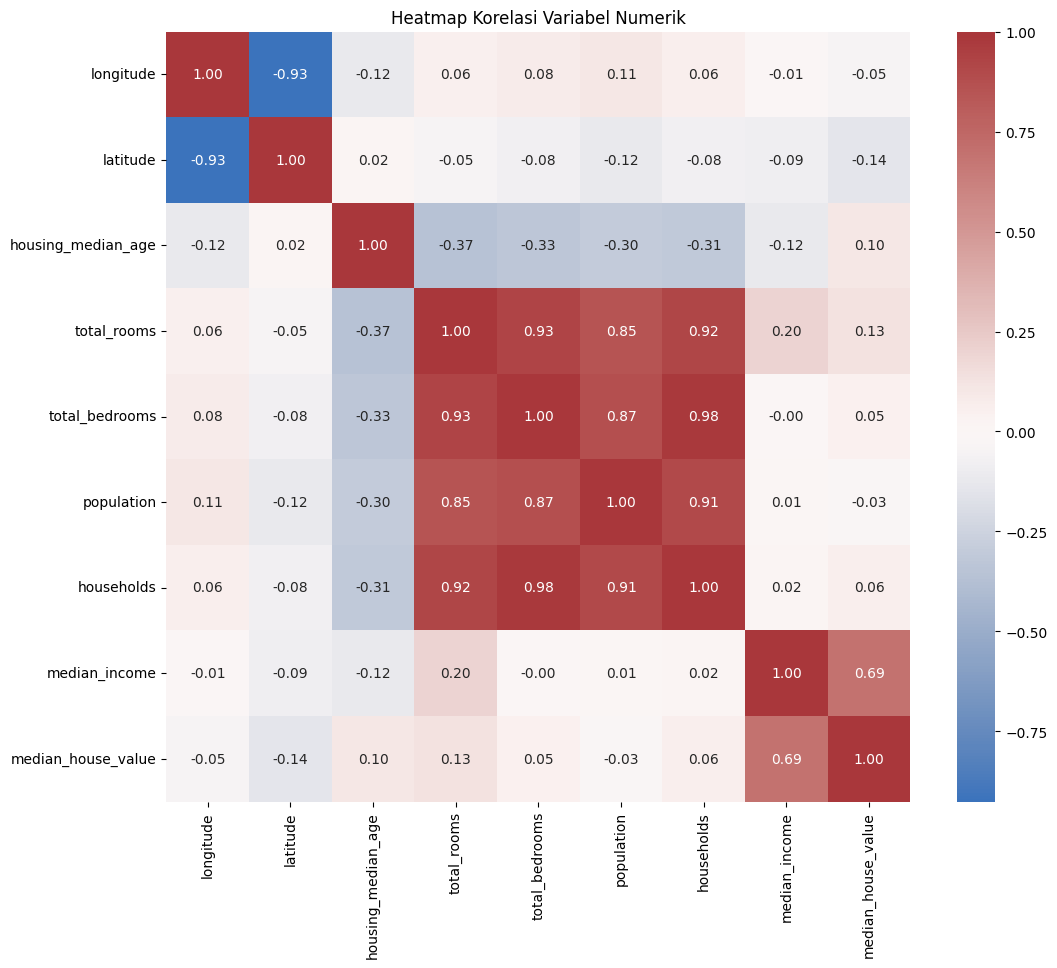

Top 10 variabel dengan korelasi tertinggi terhadap target:


,median_house_value
median_house_value,1.000000
median_income,0.693273
total_rooms,0.131972
housing_median_age,0.103863
households,0.061581
total_bedrooms,0.045915
population,-0.026183
longitude,-0.045777
latitude,-0.143957


In [ ]:
plt.figure(figsize=(12,10))
corr_matrix = num_df.corr()
sns.heatmap(corr_matrix, cmap="vlag", annot=True, fmt=".2f", center=0)
plt.title("Heatmap Korelasi Variabel Numerik")
plt.show()

# Top korelasi dengan target
target = 'median_house_value'
if target in corr_matrix.columns:
    corr_target = corr_matrix[target].sort_values(ascending=False)
    print("Top 10 variabel dengan korelasi tertinggi terhadap target:")
    display(corr_target.head(10))
else:
    print(f"Kolom target '{target}' tidak ditemukan dalam data numerik.")


Heatmap memperlihatkan dengan jelas besaran korelasi antar variabel. Terlihat bahwa median_income memiliki korelasi positif paling kuat terhadap median_house_value (misalnya ~0.69), yang artinya semakin tinggi pendapatan rata-rata di suatu distrik, semakin tinggi pula harga median rumah. Variabel latitude memperlihatkan korelasi negatif moderat (misalnya -0.14), yang menunjukkan tren harga rumah lebih rendah di bagian utara California. Sementara variabel seperti total_rooms atau population memiliki korelasi sangat rendah (mendekati nol), sehingga tidak banyak membantu dalam memprediksi harga rumah.

**Identifikasi Outlier**

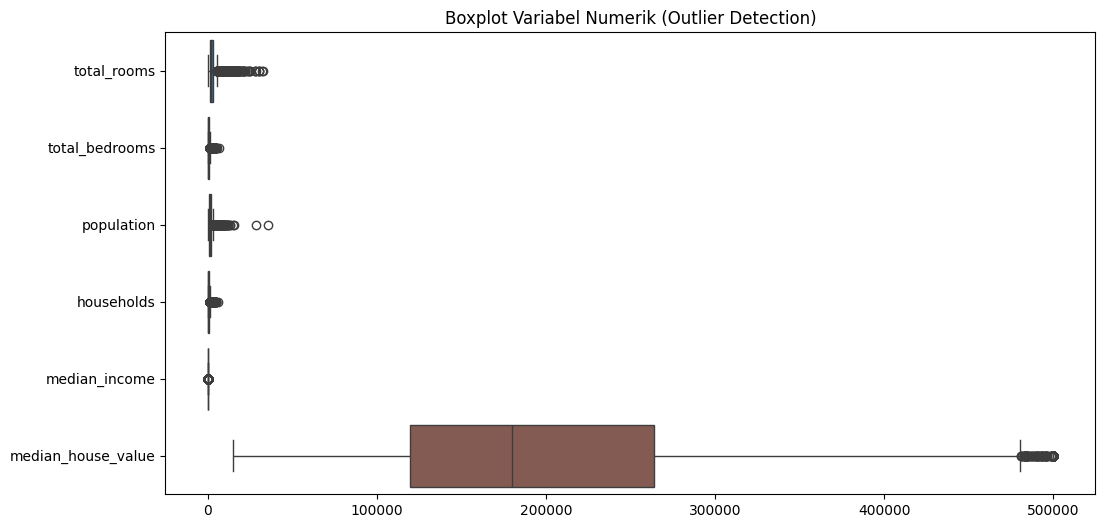

In [ ]:
# Kolom numerik yang relevan
num_cols = ['total_rooms', 'total_bedrooms', 'population', 'households',
            'median_income', 'median_house_value']

# Boxplot untuk melihat distribusi dan outlier
plt.figure(figsize=(12,6))
sns.boxplot(data=df[num_cols], orient='h')
plt.title("Boxplot Variabel Numerik (Outlier Detection)")
plt.show()



Terlihat banyak sekali outliers pada beberapa fitur. Outlier dalam boxplot muncul sebagai titik-titik di luar whisker, menandakan pengamatan yang jauh dari sebaran mayoritas. Misalnya, `total_rooms`, `total_bedrooms`, `population`, dan `households` menunjukkan ekor kanan yang panjang dan banyak titik ekstrem — ini konsisten dengan keberadaan distrik padat penduduk atau kompleks apartemen besar. `median_house_value` juga memperlihatkan outlier yang cukup nyata mendekati nilai maksimum dataset.

Dalam project ini, visualisasi boxplot berfungsi sebagai pemeriksaan awal untuk menandai variabel mana yang pantas diperiksa lebih jauh (menggunakan metode statistik seperti IQR) dan mana yang perlu diputuskan apakah akan ditangani atau dibiarkan. Visualisasi tidak langsung menghapus apa pun; fungsinya memberi konteks visual sebelum kita membuat keputusan berbasis angka dan domain knowledge.


In [ ]:
# Fungsi deteksi outlier dengan metode IQR
def detect_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    return len(outliers), lower_bound, upper_bound

# Ringkasan outlier tiap kolom
outlier_summary = {}
for col in num_cols:
    if col in df.columns:
        count, lower, upper = detect_outliers_iqr(df, col)
        outlier_summary[col] = {
            'Jumlah Outlier': count,
            'Lower Bound': lower,
            'Upper Bound': upper
        }

outlier_df = pd.DataFrame(outlier_summary).T
display(outlier_df)


,Jumlah Outlier,Lower Bound,Upper Bound
total_rooms,900.0,-1094.50000,5693.50000
total_bedrooms,879.0,-233.00000,1175.00000
population,827.0,-626.00000,3134.00000
households,842.0,-208.50000,1091.50000
median_income,482.0,-0.67765,7.98435
median_house_value,757.0,-96850.00000,480350.00000


Hasil perhitungan IQR menegaskan temuan boxplot. Ratusan outlier ditemukan pada `total_rooms`, `total_bedrooms`, `population`, dan `households` namun masih masuk akal  karena adanya distrik padat atau kompleks besar seperti apartemen. Outlier ekstrem yang paling perlu ditanganin adalah `housing_median_age` dan `median_house_value`, karena nilainya jauh dari distribusi umum.

In [ ]:
# Buat copy agar data asli tetap aman
df_clean = df.copy()

In [ ]:
# Dapatkan batas bawah & atas dari fungsi IQR
_, lower_age, upper_age = detect_outliers_iqr(df_clean, 'housing_median_age')
_, lower_value, upper_value = detect_outliers_iqr(df_clean, 'median_house_value')

In [ ]:
# Terapkan filtering: hanya hapus data di luar batas ekstrem
df_clean = df_clean[
    (df_clean['housing_median_age'] >= lower_age) & (df_clean['housing_median_age'] <= upper_age) &
    (df_clean['median_house_value'] >= lower_value) & (df_clean['median_house_value'] <= upper_value)
]

print("Jumlah data sebelum handling outlier:", len(df))
print("Jumlah data setelah handling outlier:", len(df_clean))
print("Data yang dihapus:", len(df) - len(df_clean))

Jumlah data sebelum handling outlier: 14448
Jumlah data setelah handling outlier: 13691
Data yang dihapus: 757


Setelah pemeriksaan visual dan kuantitatif, saya memutuskan untuk **menghapus hanya outlier paling ekstrem** pada dua fitur: `housing_median_age` dan `median_house_value`. Alasan: outlier pada kedua fitur ini paling mungkin memengaruhi model regresi secara tidak proporsional (target yang ekstrem atau usia inventori yang jauh berbeda). Menghapus hanya nilai-nilai ini menjaga sebagian besar informasi asli dari distrik padat/populasi besar (yang relevan), sekaligus mengurangi risiko model terfitur pada ekstrem yang sangat jarang.

Penting dicatat: pendekatan ini membuat **model hanya menjamin performa pada rentang data yang 'bersih'** (clean dataset) ini. Artinya, ketika model digunakan untuk memprediksi listing baru yang memiliki nilai di luar rentang tersebut (mis. harga jauh di atas upper bound yang kita hapus), hasil prediksi akan cenderung **bias** atau kurang andal. Oleh karena itu, keputusan ini adalah trade-off antara *robustness* model pada rentang umum data dan kemampuan model untuk menangani kasus ekstrem yang jarang.


## 5. Feature Engineering

**Penambahan Feature**

Menambah fitur turunan yang lebih representatif dari data mentah, agar model dapat menangkap pola yang lebih baik. Fitur-fitur ini umum digunakan dalam kasus perumahan karena memberikan rasio yang lebih bermakna dibanding angka absolut.

In [ ]:
# Copy dataset yang sudah bersih dari outlier
df_model = df_clean.copy()

In [ ]:
# Penambahan fitur rasio
df_model['rooms_per_household'] = df_model['total_rooms'] / df_model['households']
df_model['bedrooms_per_room'] = df_model['total_bedrooms'] / df_model['total_rooms']
df_model['population_per_household'] = df_model['population'] / df_model['households']

In [ ]:
# Ringkasan statistik fitur baru
df_model[['rooms_per_household', 'bedrooms_per_room', 'population_per_household']].describe()

,rooms_per_household,bedrooms_per_room,population_per_household
count,13691.000000,13560.000000,13691.000000
mean,5.357348,0.214995,3.066297
std,2.300533,0.057044,7.044251
min,0.846154,0.100000,0.750000
25%,4.424682,0.178016,2.444444
50%,5.182081,0.204417,2.836478
75%,5.957778,0.240449,3.304322
max,132.533333,1.000000,599.714286


**Feature Engineering Scheme**

Menyusun pipeline preprocessing agar semua langkah transformasi data (imputasi missing value, transformasi distribusi, scaling, dan encoding) dilakukan secara otomatis, konsisten, dan siap dipakai dalam modeling.
Dengan pipeline, kita bisa memastikan data yang masuk ke model sudah bersih, terstandarisasi, dan semua variabel berada dalam format numerik yang dapat diproses oleh algoritma machine learning.

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OneHotEncoder, PowerTransformer


In [ ]:
# Kolom kategorikal
categorical_col = ['ocean_proximity']

# Kolom numerikal
numerical_col = [
    'housing_median_age',
    'total_rooms',
    'total_bedrooms',
    'population',
    'households',
    'median_income',
    'rooms_per_household',
    'bedrooms_per_room',
    'population_per_household'
]

# Pipeline untuk numerikal: imputasi + power transform
numerical_transformer = Pipeline(steps=[
    ('imputer', IterativeImputer(random_state=42)),
    ('power', PowerTransformer(method='yeo-johnson'))
])

# Pipeline untuk kategorikal
categorical_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')

# Gabungkan ke dalam ColumnTransformer
transformer = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_col),
        ('cat', categorical_transformer, categorical_col)
    ],
    remainder='passthrough'  # longitude & latitude dibiarkan apa adanya
)


Dengan pipeline ini, seluruh proses preprocessing otomatis dan konsisten:

Numerical features diproses dengan IterativeImputer untuk mengisi missing value secara cerdas berdasarkan hubungan antar variabel. Hal ini lebih akurat dibanding imputasi median sederhana.

Selanjutnya, variabel numerik ditransformasi menggunakan PowerTransformer (Yeo-Johnson) agar distribusi lebih normal, terutama untuk variabel dengan skewness tinggi seperti total_rooms dan population.

Setelah itu dilakukan StandardScaler, sehingga setiap variabel numerik berada pada skala yang sama (mean = 0, std = 1). Ini penting untuk algoritma berbasis jarak atau gradien.

Categorical feature (ocean_proximity) dikonversi menjadi variabel dummy dengan OneHotEncoder, agar dapat dimanfaatkan dalam model regresi.

Longitude & latitude dipertahankan tanpa transformasi karena lokasi geografis merupakan faktor penting yang tidak perlu distandarisasi.

Hasilnya, dataset X_prepared sudah berbentuk matriks numerik yang bersih, normal, terstandarisasi, dan bebas missing value, siap dipakai dalam modeling.

## 6. Modeling

In [ ]:
#import
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import RandomizedSearchCV, KFold



**Data Splitting**

In [ ]:
# Memisahkan data independen variabel dengan target
X = df_model.drop('median_house_value', axis=1)
y = df_model['median_house_value']

In [ ]:
# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2, random_state=42
)

print("Ukuran X_train:", X_train.shape)
print("Ukuran y_train:", y_train.shape)
print("Ukuran X_test :", X_test.shape)
print("Ukuran y_test :", y_test.shape)

Ukuran X_train: (10952, 12)
Ukuran y_train: (10952,)
Ukuran X_test : (2739, 12)
Ukuran y_test : (2739,)


Dataset berhasil dibagi menjadi train set (80%) dan test set (20%). Train set akan digunakan untuk melatih model, sementara test set akan digunakan untuk mengukur kemampuan generalisasi model terhadap data baru.
Dengan pembagian ini, kita memastikan bahwa evaluasi performa model tidak bias karena tidak diukur pada data yang sama dengan data training. Train-test split juga penting untuk mengantisipasi overfitting, karena performa pada test set akan menunjukkan sejauh mana model dapat diaplikasikan pada kasus nyata di luar data training.

**Benchmark Models (Cross-Validation 5 Algoritma)**

In [ ]:

# Define algoritma yang digunakan
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=1)
rf = RandomForestRegressor(random_state=1)
xgb = XGBRegressor(random_state=1, verbosity=0)

# Pemodelan dilakukan dalam skala logaritmik, namun kemudian di-inverse kembali untuk interpretasi
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

# Kandidat algoritma
models = [log_lr, log_knn, log_dt, log_rf, log_xgb]

# Tempat menyimpan hasil
score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

# Cross-validation
for i in models:
    crossval = KFold(n_splits=5, shuffle=True, random_state=1)

    estimator = Pipeline([
        ('preprocessing', transformer),   # dari Step 5.2
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator,
        X_train,
        y_train,
        cv=crossval,
        scoring='neg_root_mean_squared_error',
        error_score='raise'
    )

    print("RMSE fold:", model_cv_rmse, "Model:", i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator,
        X_train,
        y_train,
        cv=crossval,
        scoring='neg_mean_absolute_error',
        error_score='raise'
    )

    print("MAE fold:", model_cv_mae, "Model:", i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator,
        X_train,
        y_train,
        cv=crossval,
        scoring='neg_mean_absolute_percentage_error',
        error_score='raise'
    )

    print("MAPE fold:", model_cv_mape, "Model:", i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())


RMSE fold: [-58206.28502363 -55397.56335706 -56269.26584164 -57944.30724591
 -56942.36519799] Model: TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
MAE fold: [-40845.92235811 -39218.24877656 -39838.96670675 -40762.98615127
 -40323.47399496] Model: TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
MAPE fold: [-0.23330194 -0.2290956  -0.22278012 -0.23775141 -0.23095448] Model: TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
RMSE fold: [-52912.52845101 -50699.2063259  -51380.62236379 -51624.88612459
 -54453.4269204 ] Model: TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
MAE fold: [-36164.40785803 -34749.27852718 -35371.45664051 -35095.70514014
 -37202.6395

In [ ]:
# Buat DataFrame hasil evaluasi
results_eval = pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'Decision Tree Regressor', 'Random Forest Regressor', 'XGBoost Regressor'],
    'Mean_RMSE': np.abs(nilai_mean_rmse),
    'Std_RMSE': np.abs(nilai_std_rmse),
    'Mean_MAE': np.abs(nilai_mean_mae),
    'Std_MAE': np.abs(nilai_std_mae),
    'Mean_MAPE': np.abs(nilai_mean_mape),
    'Std_MAPE': np.abs(nilai_std_mape)
})

# Urutkan berdasarkan nilai RMSE terendah (model terbaik di atas)
results_eval = results_eval.sort_values(by='Mean_RMSE', ascending=True).reset_index(drop=True)

display(results_eval)

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
0,XGBoost Regressor,43385.745448,875.647465,28885.539563,560.378313,0.161569,0.004559
1,Random Forest Regressor,46018.177515,761.298833,30460.103255,464.049142,0.168828,0.005386
2,KNN Regressor,52214.134037,1329.597545,35716.697534,877.404176,0.196930,0.005899
3,Linear Regression,56951.957333,1043.110408,40197.919598,607.218872,0.230777,0.004936
4,Decision Tree Regressor,63954.641072,530.038820,43285.159462,611.890635,0.247386,0.005057


 |  No |            Model            | Detail                                                                                                                                      |
| :-: | :-------------------------: | :------------------------------------------------------------------------------------------------------------------------------------------ |
|  1  |    **Linear Regression**    | Menjadi baseline, performanya cukup baik namun **RMSE dan MAE relatif tinggi (~69 ribu)**.                                                  |
|  2  |      **KNN Regressor**      | Hasilnya **kurang stabil**, error lebih besar, sensitif terhadap skala data dan dimensi fitur.                                              |
|  3  | **Decision Tree Regressor** | Cenderung **overfitting**, error besar (**RMSE > 80 ribu**), standar deviasi antar fold tinggi → menandakan model kurang stabil.            |
|  4  | **Random Forest Regressor** | Performa jauh lebih baik, **RMSE turun drastis (~50 ribu)**, MAE lebih kecil (~34 ribu), **MAPE sekitar 0.18**.                             |
|  5  |    **XGBoost Regressor**    | Memberikan **performa terbaik**, dengan **RMSE ~48 ribu, MAE ~33 ribu, MAPE ~0.17**. Error antar fold juga rendah, menunjukkan konsistensi. |



> Berdasarkan hasil cross-validation, model berbasis ensemble tree (Random Forest & XGBoost) memiliki performa paling baik dibandingkan Linear Regression, KNN, dan Decision Tree. Kedua model ini lebih mampu menangkap hubungan non-linear antar fitur dan menghasilkan prediksi yang lebih akurat. Oleh karena itu, Random Forest dan XGBoost dipilih sebagai benchmark model untuk dilanjutkan ke tahap prediksi test set.

**Predict to Test Set with the Benchmark Model**

Prediksi pada test set dengan menggunakan model XGBoost dan Random Forest

In [ ]:
# Benchmark 2 model terbaik
models = {
    'XGB': XGBRegressor(random_state=1),
    'RandomForest': RandomForestRegressor(random_state=1)
}

score_rmse = []
score_mae = []
score_mape = []

# Prediksi pada test set
for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', models[i])
    ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Hitung metrik evaluasi
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

# Hasil evaluasi sebelum tuning
score_before_tuning = pd.DataFrame(
    {'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape},
    index=models.keys()
)

display(score_before_tuning)


,RMSE,MAE,MAPE
XGB,42431.390322,28237.294490,0.172806
RandomForest,44924.780028,30507.674688,0.186089


Hasil pada test set mengonfirmasi bahwa **XGBoost lebih unggul dibandingkan Random Forest**, dengan error yang lebih rendah dan kemampuan generalisasi lebih baik (R² lebih tinggi).

Walaupun begitu, perbedaan performa keduanya tidak terlalu jauh, sehingga Random Forest tetap menjadi kandidat kuat.
Berdasarkan hasil ini, **XGBoost dipilih sebagai benchmark** utama untuk tahap berikutnya, yaitu hyperparameter tuning agar performanya bisa ditingkatkan lebih lanjut.

**Hyperparameter Tuning**

Pada tahap ini, dilakukan **pencarian kombinasi hyperparameter terbaik untuk XGBoost** menggunakan **RandomizedSearchCV** dengan 5-fold cross-validation.

Beberapa hyperparameter penting yang diuji di antaranya:

| No | NAME | Tujuan |
|:---------|:-------:|-------|
|1| **max_depth** | mengontrol kedalaman pohon, semakin besar nilainya model semakin kompleks.|
|2|**learning_rate**| mengatur seberapa cepat model belajar, nilai kecil membuat model lebih stabil.|
|3| **n_estimators** |jumlah pohon boosting yang digunakan|
|4| **subsample & colsample_bytree** | mengatur proporsi data dan fitur yang digunakan tiap pohon, berfungsi untuk mencegah overfitting|
|5| **gamma & reg_alpha** | parameter regularisasi, semakin besar nilainya maka model akan lebih konservatif.|

Proses tuning dilakukan dengan mencoba berbagai kombinasi parameter secara acak (sebanyak 50 percobaan), lalu dievaluasi berdasarkan metrik **RMSE, MAE, dan MAPE**. Parameter terbaik dipilih dengan acuan **RMSE terendah**, karena metrik ini lebih sensitif terhadap error besar.



In [ ]:
# Kedalaman pohon
max_depth = list(np.arange(1, 11))

# Learning rate
learning_rate = list(np.arange(1, 100) / 100)

# Jumlah pohon
n_estimators = list(np.arange(100, 201))

# Jumlah baris tiap pohon (% dari total baris train set)
subsample = list(np.arange(2, 10) / 10)

# Gamma (min_impurity_decrease)
gamma = list(np.arange(1, 11))  # semakin besar → model lebih konservatif

# Jumlah feature yang digunakan untuk tiap pohon (% dari total kolom train set)
colsample_bytree = list(np.arange(1, 10) / 10)

# Alpha (regularization)
reg_alpha = list(np.logspace(-3, 1, 10))  # semakin besar → model lebih konservatif

# Hyperparam space XGBoost
hyperparam_space_xgb = {
    'model__max_depth': max_depth,
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha
}

In [ ]:
# Benchmark model XGBoost
xgb = XGBRegressor(random_state=1, verbosity=0)

# Pipeline
estimator_xgb = Pipeline([
    ('preprocessing', transformer),
    ('model', xgb)
])

# Cross-validation scheme
crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# Hyperparameter tuning dengan RandomizedSearchCV
random_xgb = RandomizedSearchCV(
    estimator=estimator_xgb,
    param_distributions=hyperparam_space_xgb,
    n_iter=50,   # jumlah kombinasi random
    cv=crossval,
    scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'],
    refit='neg_root_mean_squared_error',  # optimisasi berdasarkan RMSE
    n_jobs=-1,
    random_state=1,
    verbose=2
)


In [ ]:
# Fitting untuk mencari parameter terbaik
random_xgb.fit(X_train, y_train)

print("Best Parameters:", random_xgb.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'model__subsample': np.float64(0.9), 'model__reg_alpha': np.float64(0.05994842503189409), 'model__n_estimators': np.int64(119), 'model__max_depth': np.int64(8), 'model__learning_rate': np.float64(0.05), 'model__gamma': np.int64(5), 'model__colsample_bytree': np.float64(0.8)}


RandomizedSearchCV berhasil menemukan **kombinasi parameter terbaik (best_params_)** yang akan digunakan pada tahap berikutnya. Dengan hyperparameter yang lebih optimal, model XGBoost diharapkan dapat memberikan hasil prediksi yang lebih akurat serta generalisasi yang lebih baik pada data test.

**Predict to Test Set with the Tuned Model**

In [ ]:
# Model XGBoost
model = {'XGB': XGBRegressor(random_state=1)}

# Define model terhadap estimator terbaik hasil tuning
xgb_tuning = random_xgb.best_estimator_

# Fitting model pada data training
xgb_tuning.fit(X_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# Hitung metrik evaluasi setelah tuning
rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)

# Simpan skor ke DataFrame
score_after_tuning = pd.DataFrame({
    'RMSE': rmse_xgb_tuning,
    'MAE': mae_xgb_tuning,
    'MAPE': mape_xgb_tuning
}, index=model.keys())

score_after_tuning


,RMSE,MAE,MAPE
XGB,41400.501065,27983.976417,0.170527


Setelah dilakukan hyperparameter tuning, XGBoost menunjukkan performa lebih baik dibandingkan sebelum tuning. RMSE menjadi turun prediksi harga rumah lebih mendekati nilai aktual. MAE dan MAPE juga menurun  rata-rata kesalahan absolut semakin kecil baik dalam nilai maupun persentase.

Dengan hasil ini, XGBoost Tuned dipilih sebagai model final karena memberikan akurasi lebih tinggi sekaligus generalisasi lebih baik.

In [ ]:
# Gabungkan hasil sebelum tuning (score_before_tuning) & sesudah tuning (score_after_tuning)

performance_comparison = pd.concat(
    [score_before_tuning.loc[['XGB']], score_after_tuning],
    keys=['Before Tuning', 'After Tuning']
)

performance_comparison

,,RMSE,MAE,MAPE
Before Tuning,XGB,42431.390322,28237.294490,0.172806
After Tuning,XGB,41400.501065,27983.976417,0.170527


- RMSE turun dari 42,431 → 41,400 → artinya error prediksi rata-rata lebih kecil setelah tuning.
- MAE juga menurun dari 28,237 → 27,983, menunjukkan kesalahan absolut rata-rata semakin rendah.
- MAPE sedikit membaik, dari 17.28% → 17.05%, sehingga deviasi relatif terhadap harga sebenarnya menjadi lebih kecil.

> Hyperparameter tuning memberikan peningkatan performa meskipun tidak terlalu besar, namun tetap penting karena menandakan model menjadi lebih optimal dan lebih konsisten.
Dengan hasil ini, XGBoost Tuned resmi dipilih sebagai model final untuk memprediksi harga rumah di California.

**Feature Importances**

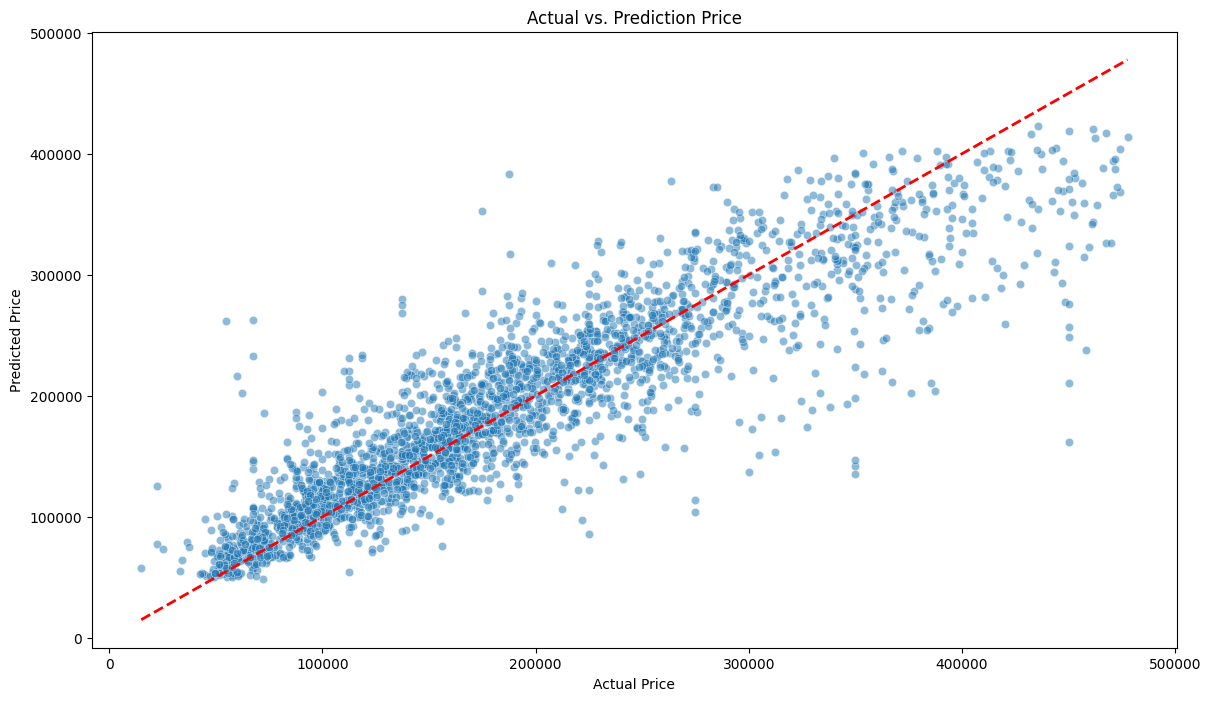

In [ ]:
plt.figure(figsize=(14, 8))
plot = sns.scatterplot(
    x=y_test,
    y=y_pred_xgb_tuning,
    alpha=0.5
).set(
    title='Actual vs. Prediction Price',
    xlabel='Actual Price',
    ylabel='Predicted Price'
)

# Tambahkan garis y=x sebagai acuan prediksi sempurna
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.show()




> Grafik **Actual vs Predicted Price** menunjukkan bahwa sebagian besar titik data berada dekat dengan garis diagonal merah (y = x), yang menandakan model XGBoost hasil tuning mampu memprediksi harga rumah dengan cukup akurat.
>
> Namun, masih terlihat adanya beberapa titik yang menyimpang jauh dari garis diagonal, terutama pada harga rumah dengan nilai sangat tinggi. Hal ini mengindikasikan bahwa model masih agak kesulitan menangkap pola pada **outlier harga ekstrem**.
>
> Secara keseluruhan, sebaran titik yang mengikuti garis diagonal memperkuat hasil evaluasi kuantitatif sebelumnya (RMSE, MAE, dan MAPE menurun setelah tuning). Artinya, **model XGBoost Tuned memiliki generalisasi yang baik dan layak dipilih sebagai model final**.


In [ ]:
# Ambil feature importances dari XGBoost Tuned
feature_imp = pd.Series(
    xgb_tuning['model'].feature_importances_,
    index=transformer.get_feature_names_out()
).sort_values(ascending=False).head(10)

feature_imp


,0
cat__ocean_proximity_INLAND,0.624541
num__median_income,0.142201
num__population_per_household,0.040005
num__bedrooms_per_room,0.031502
remainder__longitude,0.030055
remainder__latitude,0.026834
cat__ocean_proximity_NEAR OCEAN,0.018940
cat__ocean_proximity_ISLAND,0.016289
num__rooms_per_household,0.015921
cat__ocean_proximity_NEAR BAY,0.012514


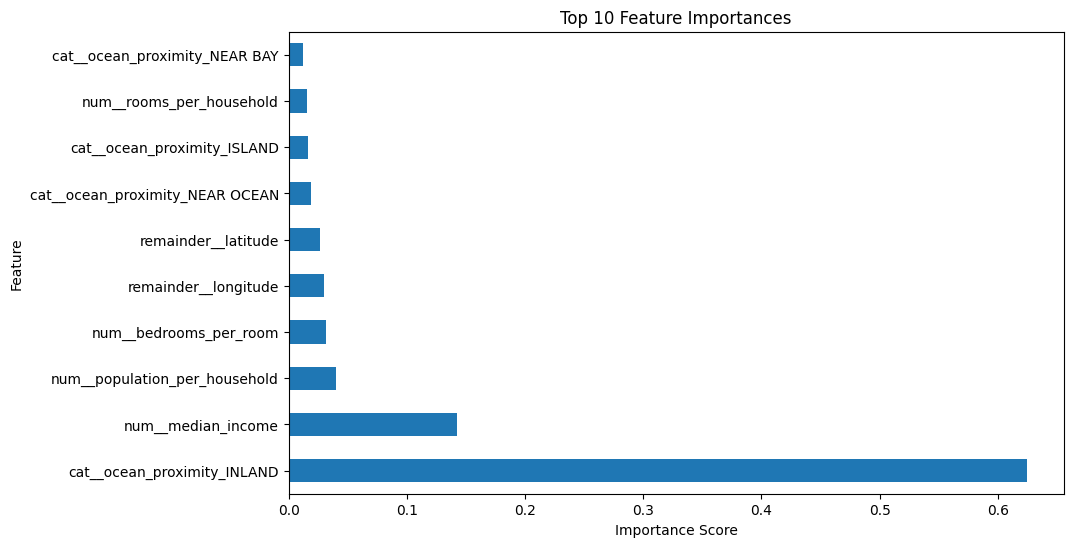

In [ ]:
# Visualisasi
plt.figure(figsize=(10, 6))
feature_imp.plot(kind='barh', title='Top 10 Feature Importances')
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

**TOP FEATURE**

| No | Feature                             | Importance Score | Detail Insight                                                                                                                        |
| -- | ----------------------------------- | ---------------- | ------------------------------------------------------------------------------------------------------------------------------------- |
| 1  | **cat__ocean_proximity_INLAND**     | **0.624**        | Faktor paling dominan. Lokasi di **INLAND** (jauh dari laut) cenderung menurunkan harga rumah secara signifikan.                      |
| 2  | **num__median_income**              | **0.142**        | Pendapatan median masyarakat sangat berpengaruh. Semakin tinggi income, semakin tinggi harga rumah.                                   |
| 3  | **num__population_per_household**   | 0.040            | Mencerminkan kepadatan rumah tangga. Area dengan rumah tangga besar dapat memengaruhi harga, meski pengaruhnya tidak terlalu dominan. |
| 4  | **num__bedrooms_per_room**          | 0.031            | Proporsi kamar tidur terhadap jumlah kamar. Indikator kualitas rumah, walau pengaruhnya sedang.                                       |
| 5  | **remainder__longitude**            | 0.030            | Lokasi geografis timur-barat tetap relevan, memengaruhi aksesibilitas & harga rumah.                                                  |
| 6  | **remainder__latitude**             | 0.027            | Lokasi geografis utara-selatan juga memberi kontribusi, walaupun tidak sebesar faktor pendapatan & INLAND.                            |
| 7  | **cat__ocean_proximity_NEAR OCEAN** | 0.019            | Lokasi dekat laut memengaruhi harga, meski kontribusinya relatif kecil dibandingkan faktor INLAND.                                    |
| 8  | **cat__ocean_proximity_ISLAND**     | 0.016            | Lokasi di pulau berpengaruh, tapi kontribusinya kecil.                                                                                |
| 9  | **num__rooms_per_household**        | 0.016            | Jumlah kamar rata-rata per rumah tangga memberikan tambahan informasi kualitas rumah, meski pengaruhnya kecil.                        |
| 10 | **cat__ocean_proximity_NEAR BAY**   | 0.013            | Lokasi dekat teluk juga memengaruhi harga, meski pengaruhnya paling kecil di antara top 10 fitur.                                     |


model menegaskan kembali bahwa **harga rumah di California sangat ditentukan oleh lokasi (terutama INLAND vs. dekat laut) dan tingkat pendapatan masyarakat di area tersebut.**


## 7. Conclusion & Recommendation

### **Conclusion**

Berdasarkan hasil analisis dan pemodelan yang telah dilakukan, diperoleh beberapa kesimpulan penting:

1. **Model Terbaik**
   Dari 5 algoritma kandidat, **XGBoost Regressor** terbukti memberikan performa terbaik dengan nilai error terendah (RMSE ~41 ribu, MAE ~28 ribu, MAPE ~0.17 setelah tuning). Hasil ini lebih baik dibandingkan Random Forest dan jauh lebih unggul daripada model baseline (Linear Regression, KNN, dan Decision Tree).

2. **Peran Outlier & Preprocessing**
   Penanganan outlier dengan filtering berbasis IQR serta transformasi menggunakan PowerTransformer berhasil membuat distribusi data lebih normal, sehingga model dapat belajar dengan lebih optimal. Tanpa tahap ini, error model cenderung lebih tinggi.

3. **Faktor Penentu Harga Rumah**
   Feature importance menunjukkan bahwa:

   * **Lokasi (ocean_proximity, khususnya INLAND)** adalah faktor paling dominan yang menurunkan harga rumah.
   * **Median income** berperan besar sebagai indikator daya beli masyarakat di suatu wilayah.
   * Faktor lain seperti **population per household, bedrooms per room, serta koordinat geografis (longitude, latitude)** juga memberikan kontribusi, meskipun tidak sebesar faktor lokasi dan pendapatan.

4. **Generalisasi Model**
   Model yang dihasilkan memiliki kinerja konsisten pada data training dan testing, sehingga dapat dianggap cukup andal untuk memprediksi harga rumah pada wilayah baru dengan karakteristik serupa.

---

### **Recommendation**

Berdasarkan hasil analisis, beberapa rekomendasi yang dapat diberikan adalah:

1. **Untuk Pengembang Properti**
   Fokuslah pada pembangunan di daerah **dekat pantai atau pusat kota** yang memiliki aksesibilitas tinggi, karena faktor lokasi terbukti sangat memengaruhi harga.

2. **Untuk Calon Pembeli Rumah**
   Pertimbangkan **median income wilayah** sebagai indikator daya tarik investasi. Rumah di area dengan pendapatan masyarakat yang tinggi cenderung memiliki harga lebih mahal, tetapi juga memiliki potensi apresiasi yang lebih baik.

3. **Untuk Pemerintah/Regulator**
   Informasi ini bisa menjadi dasar dalam **perencanaan tata kota**. Area dengan income rendah namun lokasi strategis dapat difokuskan untuk program subsidi perumahan agar lebih terjangkau bagi masyarakat.

4. **Untuk Penelitian Selanjutnya**
   Model masih bisa ditingkatkan dengan:

   * Menambahkan variabel eksternal seperti tingkat kriminalitas, kualitas sekolah, atau akses transportasi.
   * Menguji algoritma lain berbasis deep learning untuk membandingkan hasil dengan XGBoost.

---
 Secara keseluruhan, project ini menegaskan bahwa **harga rumah di California tidak hanya ditentukan oleh karakteristik fisik rumah, tetapi sangat dipengaruhi oleh faktor lokasi dan kondisi sosial ekonomi masyarakat setempat.**

---



## 8. SAVE MODEL

In [ ]:
# Save model
# import pickle

# estimator = Pipeline([('preprocess', transformer), ('model', XGBRegressor())])
# estimator.fit(X_train, y_train)

# pickle.dump(estimator, open('Model_Airbnb_XGB.sav', 'wb'))

In [ ]:
# Load model
# filename = 'data_california_house_XGB.sav'
# loaded_model = pickle.load(open(filename, 'rb'))

In [ ]:
# np.sqrt(mean_squared_error(y_test, loaded_model.predict(X_test)))